# Exercise 1: Exploring PCA

In this exercise, we'll use PCA and try to gain a better understanding of how the number of components effects the it's performance.

#### Step 1: Setup

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data - this is the handwritten digits dataset
# Each digit is 
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Reduce the data using PCA

This will also visualize the data

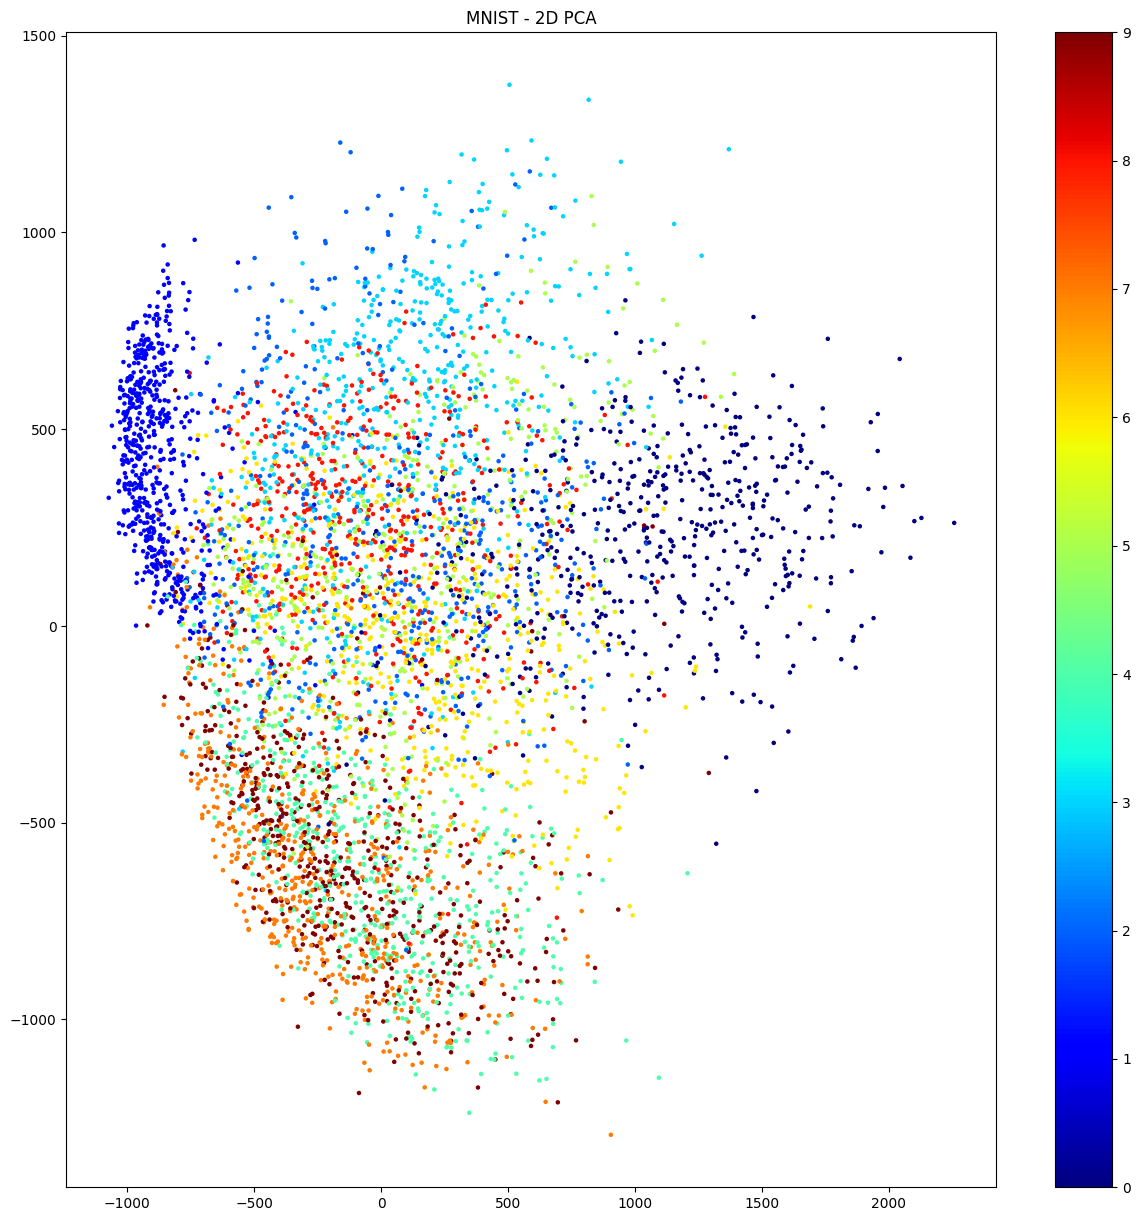

In [6]:
# TODO:  Reduce the data using PCA
# Reduce the data using PCA
# Reduce the data using PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization
X_mnist_reduced = pca.fit_transform(X_mnist_train)

# Now plotting
plt.figure(figsize=(15, 15))
plt.scatter(X_mnist_reduced[:, 0], X_mnist_reduced[:, 1], c=y_mnist_train, cmap="jet", s=5)
plt.colorbar()
plt.title("MNIST - 2D PCA")
plt.show()


#### Step 3: Look at the scree plot of variance

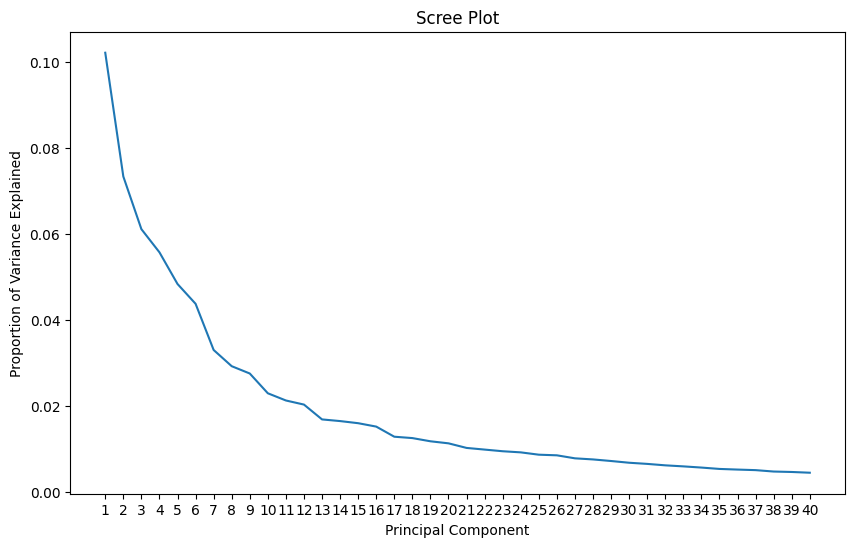

In [8]:
# TODO:  Populate proportion of variance explained for the first 40 dimensions
pca = PCA(n_components=40)
pca.fit(X_mnist_train)



variance_explained = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(variance_explained) + 1))
plt.show()

#### Step 4: Select the number of components

In the following, calculate the number of components required to get to 95% variance explained.

In [ ]:
# Step 4: Number of components for 95% variance
threshold = 0.95
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_explained >= threshold) + 1
print(f"Number of components for {threshold*100}% variance: {n_components}")

# Output should say 148?


Number of components for 95.0% variance: 1


#### Step 5: Visualize a digit in the reduced dimensionality space

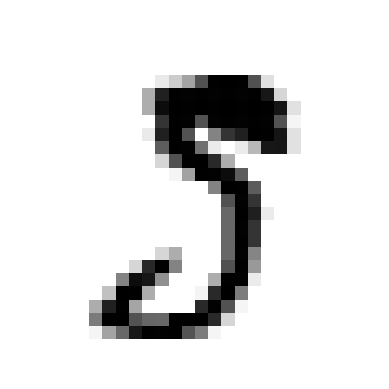

In [14]:
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

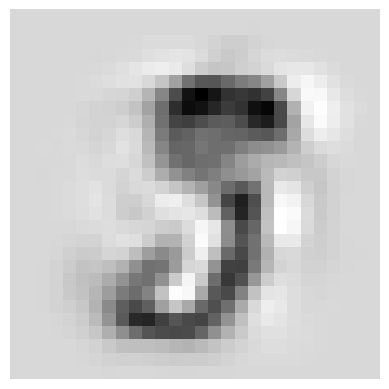

In [15]:
# Use PCA with n_components to transform the above digit.  How does it look?
number_of_components = 40
pca_test = PCA(n_components=number_of_components)
xr = pca_test.fit_transform(X_mnist_train)
x_regen  = pca_test.inverse_transform(xr[0])
plot_mnist_digit(x_regen)

#### Step 6: Use dimensionality reduction to preprocess data for a classifier

In [18]:
# Step 5: k-NN Classification
# Without PCA
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Original Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")

# TODO:  Replicate the above, but pre-process the data with PCA first
# You have some work to do right here
# Apply PCA for dimensionality reduction
pca = PCA(n_components=40)  # You can experiment with this value
X_mnist_train_pca = pca.fit_transform(X_mnist_train)
X_mnist_test_pca = pca.transform(X_mnist_test)

# Train a new k-NN classifier on the PCA-transformed data
knn_pca = KNeighborsClassifier()  # New instance of k-NN
knn_pca.fit(X_mnist_train_pca, y_mnist_train)
y_pred_pca = knn_pca.predict(X_mnist_test_pca)

print(f"PCA-transformed Data Accuracy: {accuracy_score(y_mnist_test, y_pred_pca)}")


Original Data Accuracy: 0.9421428571428572
PCA-transformed Data Accuracy: 0.9521428571428572


# Exercise 2:  Comparisons with TSNE

1. Try using t-SNE to visualize the MNIST data above.  How does it compare to PCA?
2. Try using a KNN classifier to predict the data with TSNE.  How does it perform? 
   - Try with different numbers of dimensions.  How many dimensions do you need with TSNE to achieve performance close to PCA with 80% variance preserved?  
   - How does PCA perform with 2 components?


# Exercise 3: PCA vs. Kernel PCA on Non-linear Data

Compare linear Principal Component Analysis (PCA) with Kernel PCA on a non-linear dataset, focusing on how each method captures and reconstructs the data's structure.

## Tasks

1. Data Generation:
   - Generate the "moons" dataset using sklearn.datasets.make_moons.
   - Add Gaussian noise to the dataset.

2. Implement PCA:
   - Apply standard PCA to reduce the dataset to 1 dimension.
   - Use the inverse_transform method to project the data back to 2 dimensions.
   - Visualize the original 2D data and the PCA reconstruction.

3. Implement Kernel PCA:
   - Apply Kernel PCA with a radial basis function (RBF) kernel to reduce the dataset to 1 dimension.
   - Use the inverse_transform method to project the data back to 2 dimensions.
   - Visualize the original 2D data and the Kernel PCA reconstruction.

4. Classification Task:
   - Split the data into training and testing sets.
   - Train a simple classifier (e.g., Logistic Regression) on:
     a) The original 2D data
     b) The 2D PCA reconstruction
     c) The 2D Kernel PCA reconstruction
   - Compare the classification accuracies.

5. Parameter Exploration (Optional):
   - Experiment with different noise levels in the dataset.
   - Try different kernels for Kernel PCA (e.g., polynomial, sigmoid).


#### Step 1: Data setup (nothing to do here other than run!)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to generate noisy moons dataset
def generate_noisy_moons(n_samples=1000, noise=0.1):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    return X, y



# Generate data
X, y = generate_noisy_moons(n_samples=1000, noise=0.1)


#### Step 2: Run PCA and Kernel PCA

In [ ]:

# Apply PCA
pca = #TODO implement pca and then run
X_pca_reconstructed = #TODO use pca to reconstruct the data

# Apply Kernel PCA
kpca = #TODO implement pca and then run
X_kpca_reconstructed - #TODO use kpca to reconstruct the data

# Visualize the data and reconstructions
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data')

# PCA reconstruction
plt.subplot(132)
plt.scatter(X_pca_reconstructed[:, 0], X_pca_reconstructed[:, 1], c=y, cmap='viridis')
plt.title('PCA Reconstruction')

# Kernel PCA reconstruction
plt.subplot(133)
plt.scatter(X_kpca_reconstructed[:, 0], X_kpca_reconstructed[:, 1], c=y, cmap='viridis')
plt.title('Kernel PCA Reconstruction')

plt.tight_layout()
plt.show()


#### Step 3: Use the transformed data for classification

In [ ]:

# Classification task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Original data
clf_original = LogisticRegression(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# TODO use logistic regression on the PCA transformed data
acc_pca = # Code here

# TODO use logistic regression on the KPCA transformed data
acc_kpca = # Code here

print(f"Accuracy on original data: {acc_original:.4f}")
print(f"Accuracy with PCA reconstruction: {acc_pca:.4f}")
print(f"Accuracy with Kernel PCA reconstruction: {acc_kpca:.4f}")


# Exercise 4: Comparison of Manifold Learning Techniques

Compare different manifold learning techniques on a synthetic dataset to understand their strengths and weaknesses in capturing non-linear structures and reducing dimensionality.


1. Data Generation:
   - Examine the data generation code, and understand what it is doing

2. Implement and Visualize Different Manifold Learning Techniques:
   Apply the following techniques to reduce the 3D S-curve to 2D:
   a) PCA (as a baseline linear method)
   b) t-SNE
   c) UMAP
   Visualize the results of each method.

3. Quantitative Comparison:
   - Implement a function to calculate the trustworthiness (from sklearn.manifold) of each embedding.
   - Compare the "trustworthiness" scores for each method. (Note - trustworthiness is a comparison that measures how well correlated distances in the transformed data are with the original data)

4. Computational Efficiency:
   - Measure and compare the execution time of each method.

5. Parameter Exploration:
   - For one of the methods (e.g., t-SNE or UMAP), explore how changing a key parameter affects the result.


#### Step 1: Examine the underlying data

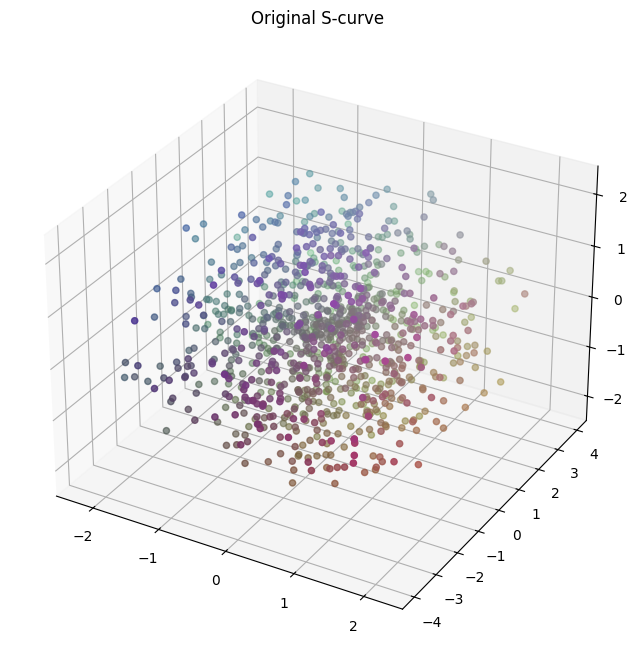

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
from sklearn.manifold import trustworthiness
import umap
import time


def make_double_s_curve(n_samples=1000, noise=0.1, random_state=None):
    """Generate a dataset with two intertwined S-curves"""
    X1, _ = make_s_curve(n_samples=n_samples, noise=noise, random_state=random_state)
    X2, _ = make_s_curve(n_samples=n_samples, noise=noise, random_state=random_state+1)
    
    # Rotate the second S-curve by swapping axes
    X2 = X2[:, [1, 2, 0]]
    
    # Combine the two S-curves
    X = X1 * X2
    
    return X



# UNDERSTAND THIS - we are using color here to illustrate which points are next to one another
# colors that are closer to one another are also closer in the original space.  This will help us 
# understand how the transformation effects the space

def create_rgb_colors(X):
    """Create RGB colors based on the 3D coordinates"""
    # Normalize X to [0, 1] range
    X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    
    # Scale to [0.2, 0.7] range
    X_color = X_norm * 0.5 + 0.2
    
    return X_color

# Generate the dataset
n_points = 1000
X = make_double_s_curve(n_samples=n_points, noise=0.05, random_state=42)

# Create RGB colors
colors = create_rgb_colors(X)


# Add some noise
noise = np.random.normal(scale=0.1, size=X.shape)
X_noisy = X + noise


fig = plt.figure(figsize=(8,8))
# Plot original data
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_noisy[:, 0], X_noisy[:, 1], X_noisy[:, 2], c=colors)
ax.set_title("Original S-curve")
plt.show()


#### Step 2: Plot the embeddings and print statistics

/Users/jeintron/Dropbox/@TEACHING/2024/FALL/teaching-venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


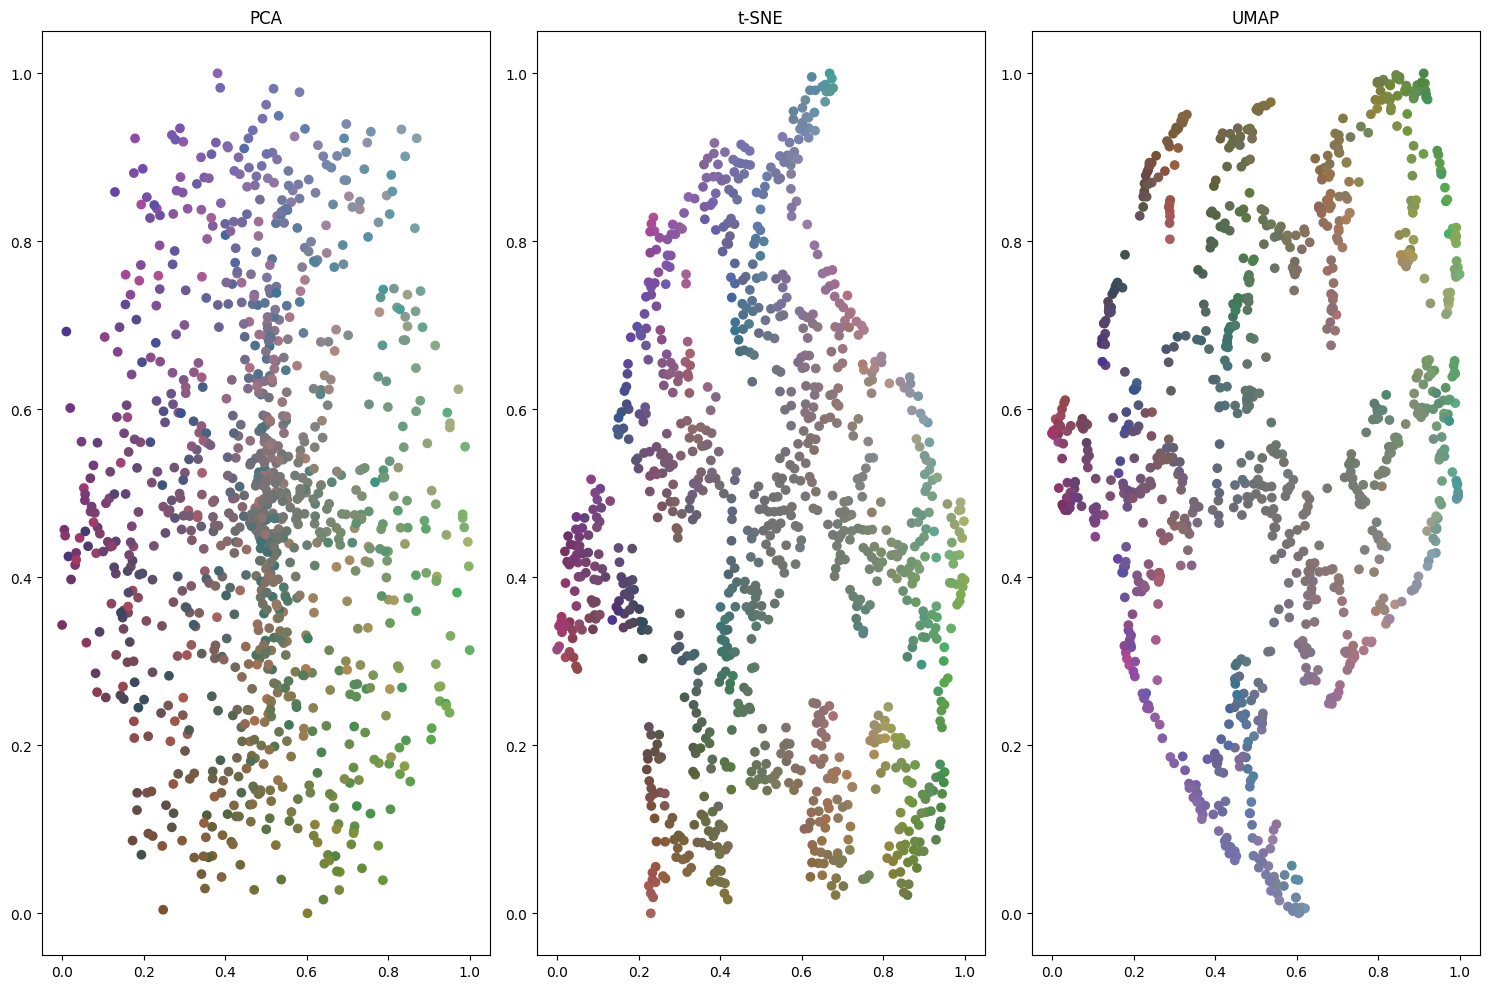

Method		Time (s)	Trustworthiness
--------------------------------------------------
PCA       	0.00		0.9112
t-SNE     	2.53		0.9957
UMAP      	2.51		0.9911


In [14]:
def plot_embedding(ax, X, title,s = None):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    if s is not None:
        ax.scatter(X[:, 0], X[:, 1], c=colors, s = s)
    else:
        ax.scatter(X[:, 0], X[:, 1], c=colors)
    ax.set_title(title)



# List of manifold learning methods
methods = [
    # TODO: FIll this in with a list of methods
]

results = []
times = []
trustworthiness_scores = []

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

for i, (name, method) in enumerate(methods):
    
    # TODO: Fill this out to calcuate the necessary stats

    X_transformed  = # Code here
    trustworthiness_scores.append(trustworthiness(X_noisy, X_transformed, n_neighbors=10))
    
    ax = axs[i]
    plot_embedding(ax,X_transformed, f"{name}")  # Pass color here


plt.tight_layout()
plt.show()

# Print results
print("Method\t\tTime (s)\tTrustworthiness")
print("-" * 50)
for (name, _), t, trust in zip(methods, times, trustworthiness_scores):
    print(f"{name:<10}\t{t:.2f}\t\t{trust:.4f}")


#### Step 3: Explore the parameters for UMAP

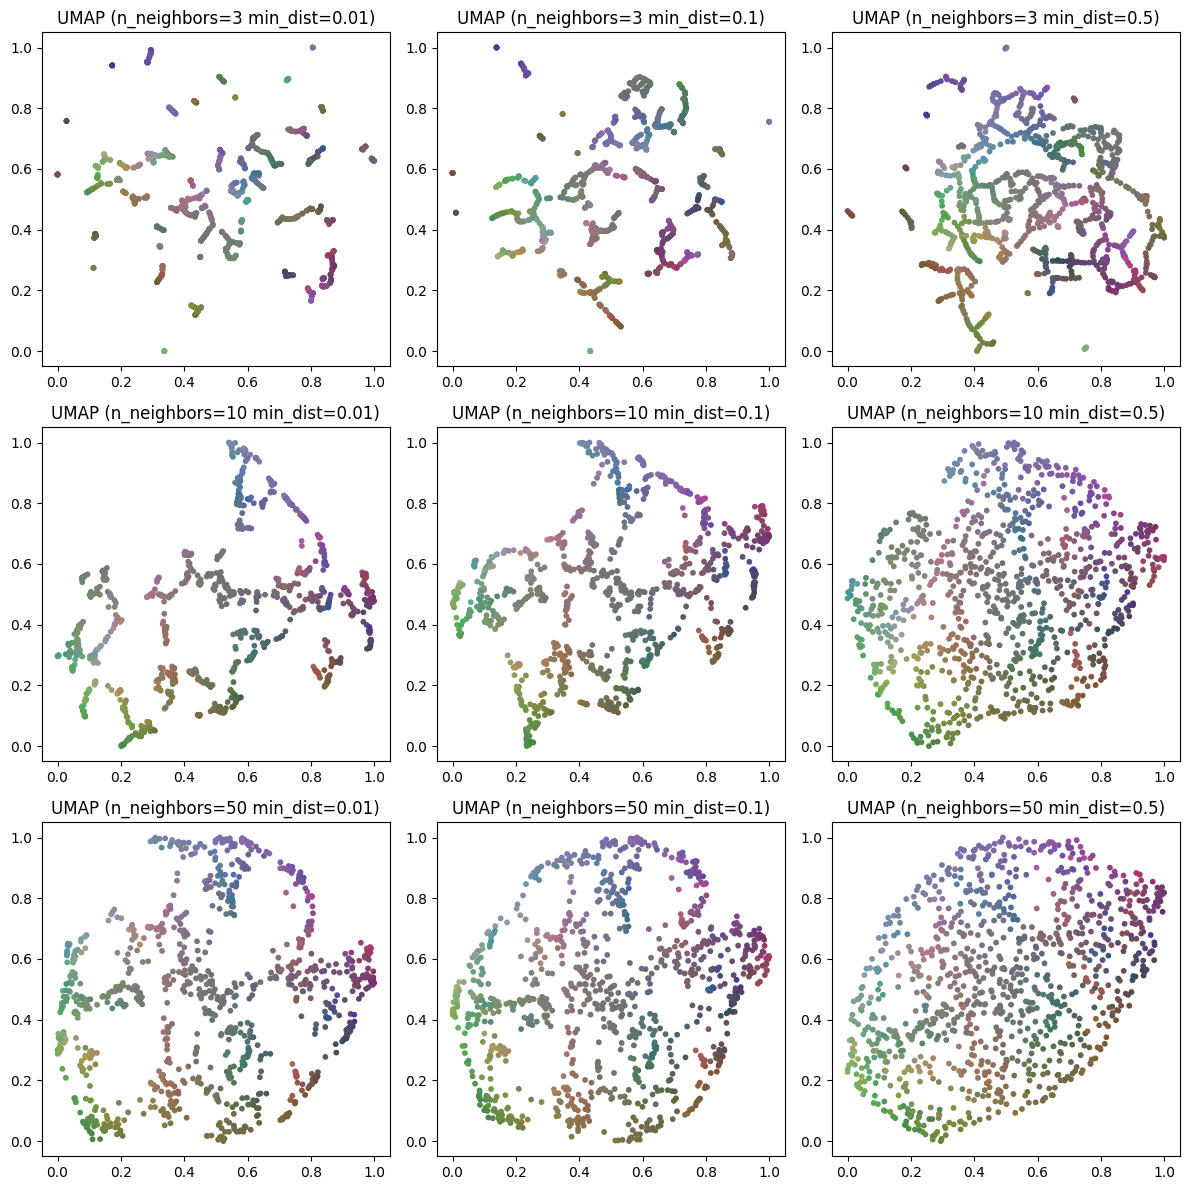

In [15]:

# Parameter exploration for umap
n_neighbors = [3,10,50]
min_dist = [.01, .1, .5]
fig, axs = plt.subplots(3, 3, figsize=(12, 12))


# And in the UMAP parameter exploration:
for i, nn in enumerate(n_neighbors):
    for j, md in enumerate(min_dist):
        # TODO Run umap at each parameter setting and then plot it in the relevant place
        ax = axs[i,j]
        plot_embedding(ax,X_umap, f"UMAP (n_neighbors={nn} min_dist={md})",s=10)  # Pass color here

plt.tight_layout()
plt.show()